### Математическая статистика. Полеты в Нью-Йорке в 2013 году.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 9
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('flights_NY.csv').dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327346 entries, 0 to 336769
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       327346 non-null  int64  
 1   month      327346 non-null  int64  
 2   day        327346 non-null  int64  
 3   dep_time   327346 non-null  float64
 4   dep_delay  327346 non-null  float64
 5   arr_time   327346 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    327346 non-null  object 
 8   tailnum    327346 non-null  object 
 9   flight     327346 non-null  int64  
 10  origin     327346 non-null  object 
 11  dest       327346 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   327346 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 37.5+ MB


In [4]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762


### Задание 1. *По каждой авиакомпании оцените вероятность того, что задержка прилета будет положительной и нарисуйте график, показывающий распределение этой вероятности по авиакомпаниям.*


In [5]:
df_arr_delay = df[df['arr_delay'] >= 0]

In [6]:
df_arr_delay

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
5,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719
6,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,2013,9,30,2207.0,27.0,2257.0,7.0,MQ,N532MQ,3660,LGA,BNA,97.0,764
336760,2013,9,30,2211.0,72.0,2339.0,57.0,EV,N12145,4672,EWR,STL,120.0,872
336762,2013,9,30,2233.0,80.0,112.0,42.0,UA,N578UA,471,EWR,SFO,318.0,2565
336763,2013,9,30,2235.0,154.0,59.0,130.0,B6,N804JB,1083,JFK,MCO,123.0,944


In [7]:
airlines = ['EWR', 'LGA', 'JFK']
for airline in airlines:
    arr_delay = df_arr_delay.loc[df_arr_delay['origin'] == airline]
    probab_arr_delay = len(arr_delay['origin'])/len(df[df['origin'] == airline]['origin'])
    print('Доля положительных задержек перелетов по авиакомпании', airline, '=', probab_arr_delay)

Доля положительных задержек перелетов по авиакомпании EWR = 0.44409060250838833
Доля положительных задержек перелетов по авиакомпании LGA = 0.41238876804429503
Доля положительных задержек перелетов по авиакомпании JFK = 0.4096938915831645


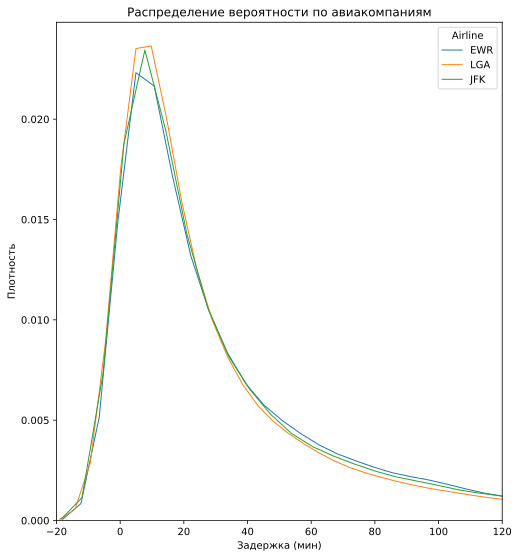

In [8]:
for airline in airlines:
    fly = df[df['origin'] == airline]
    sns.distplot(fly[fly['arr_delay']>=0]['arr_delay'], hist = False, kde = True,
             kde_kws = {'linewidth': 1},
                 label = airline)
plt.xlim(-20, 120)
plt.legend(prop={'size': 10}, title = 'Airline')
plt.title('Распределение вероятности по авиакомпаниям'); 
plt.xlabel('Задержка (мин)')
plt.ylabel('Плотность');

Графики распределения плотности вероятности по авиакомпаниям имеют очень схожий вид.

### Задание 2. *Построить гистограмму расстояния перелета distance. Выделить три группы перелетов: короткие, средние и длинные. Куда летят самолеты в группе длинных перелетов? Найти среднее время задержки вылета в каждой из трех выделенных групп.*

Для оптимального выделения групп полетов нужно построить гистрограмму распределения времени полета.

In [9]:
air_flight = df['air_time']

Text(0.5, 1.0, 'Гистограмма распределения времени полета')

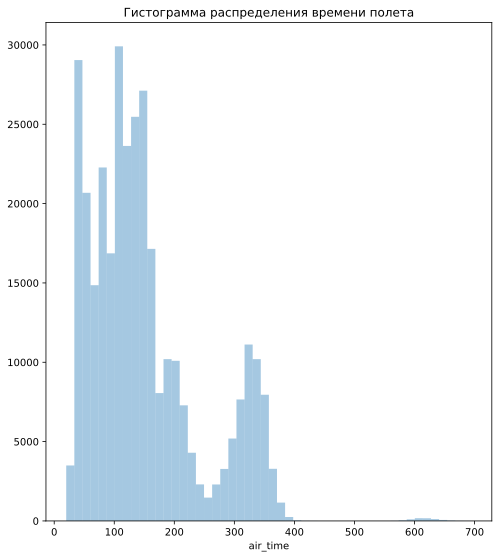

In [10]:
sns.distplot(air_flight, hist = True, kde = False,
           kde_kws = {'linewidth': 1})
plt.title('Гистограмма распределения времени полета')

I группа: до 80 минут. <br>
II группа: от 80 до 170 минут. <br>
III группа: более 170 минут.

In [11]:
near = df[df['distance'] <= 760]

In [12]:
middle = df[(df['distance'] > 760) & (df['distance'] <= 1600)]

In [13]:
far = df[df['distance'] > 1600]

Text(0, 0.5, 'Плотность')

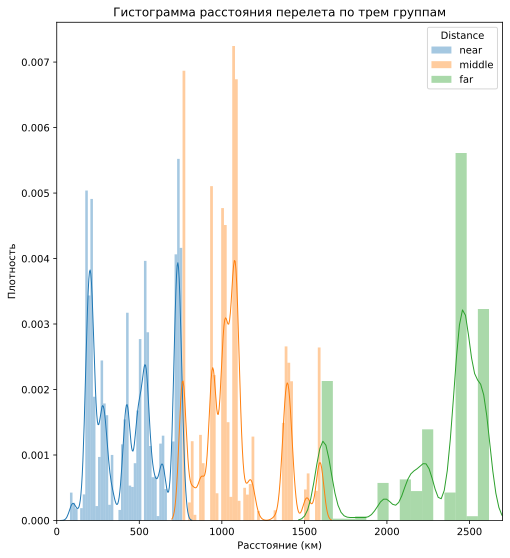

In [14]:
sns.distplot(near['distance'], hist = True, kde = True,
           kde_kws = {'linewidth': 1},
            label = 'near')
sns.distplot(middle['distance'], hist = True, kde = True,
            kde_kws = {'linewidth': 1},
             label = 'middle')
sns.distplot(far['distance'], hist = True, kde = True,
            kde_kws = {'linewidth': 1},
               label = 'far')
plt.xlim(0, 2700)
plt.legend(prop={'size': 10}, title = 'Distance')
plt.title('Гистограмма расстояния перелета по трем группам'); 
plt.xlabel('Расстояние (км)')
plt.ylabel('Плотность')

In [15]:
dest = far['dest']
dest.describe()

count     63286
unique       27
top         LAX
freq      16026
Name: dest, dtype: object

Как видим, дальние перелеты чаще всего производились в **LAX.**

In [16]:
distance = [near, middle, far]
print('Среднее время задержки вылета (мин) в группах near, middle и far равно соответственно')
for i in distance:
    i = i['dep_delay'].mean()
    print(i)

Среднее время задержки вылета (мин) в группах near, middle и far равно соответственно
13.535542639991059
12.149295331987958
11.11293177005973


 ### Задание 3. *Нарисуйте график среднего времени задержки вылета по месяцам и отметьте на нем границы доверительных интервалов с уровнем доверия 0.95. С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05? на уровне значимости 0.01?*

In [17]:
Month = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

In [18]:
dep_delay_month_average = []
dots = []
confidence = 0.95
for i in range(1,13):
    month = df[df['month'] == i]
    interval = stats.norm.interval(confidence, loc=month['dep_delay'].mean(),
                               scale=stats.sem(month['dep_delay']))
    dots.append(interval)
    dep_delay_month_average.append(month['dep_delay'].mean())
y1 = list(zip(*dots))[0] #нижняя граница доверительного интервала
y2 = list(zip(*dots))[1] #верхняя граница доверительного интервала
print(y1)
print(y2)

(9.547487811696357, 10.298906895459746, 12.694367349961434, 13.34282576439827, 12.433799324572384, 20.114658064571547, 20.925081131172433, 12.1359701728788, 6.207256308191644, 5.889496796471599, 5.0914608610352925, 15.984561084051757)
(10.423494838504418, 11.221570847964928, 13.634211246554946, 14.35554892722849, 13.349619332993033, 21.336570005603892, 22.119276130341014, 13.005078651714328, 7.053313851008653, 6.576853053273316, 5.749219870120394, 16.979761639856463)


Text(0.5, 1.0, 'Среднее время задержки вылета по месяцам ')

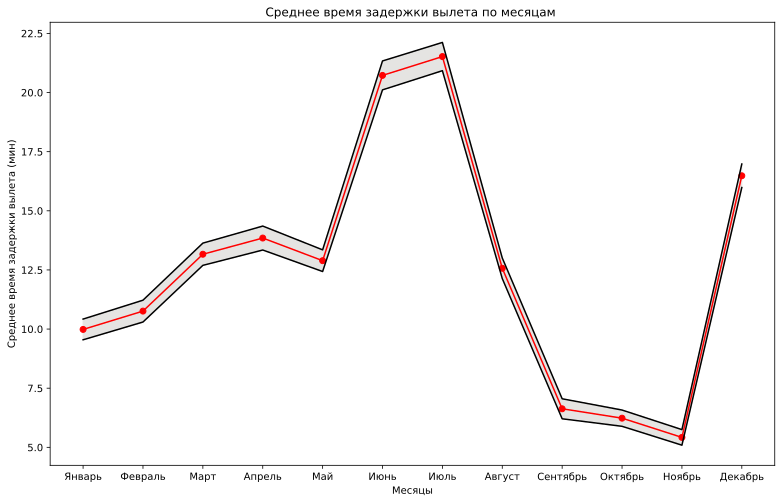

In [19]:
rcParams['figure.figsize'] = 13,8
plt.plot(Month, dep_delay_month_average, color = 'red', marker = 'o')
plt.plot(Month, dots, color = 'black')
plt.fill_between(Month, y1=y1, y2=y2, color = '#E5E4E2')
plt.xlabel('Месяцы')
plt.ylabel('Среднее время задержки вылета (мин)')
plt.title('Среднее время задержки вылета по месяцам ')

Для проверки равенства средних воспользуемся t-тестом.

In [20]:
first_Group = df[df['month'] == 1]['dep_delay']
second_Group = df[df['month'] == 2]['dep_delay']

In [21]:
statistics, p = stats.ttest_ind(first_Group, second_Group)
print('P-значение:', p)

P-значение: 0.017013366495100532


#### Видим, что p-value = 0.017
При $\alpha = 0.05$ => $p-value < \alpha$. Тогда следует отвергнуть нулевую гипотезу о равенстве средних. <br>
**На уровне значимости 0.01**, то есть при $\alpha = 0.01$ => $p-value > \alpha$. <br>
**На уровне значимости $\alpha = 0.01$ можем принять гипотезу о том, что средние в январе и феврале равны.**

### Задание 4: *Найдите коэффициент корреляции между расстоянием distance и временем полета air_time. Постройте точечную диаграмму в осях distance (х) и air_time (y). Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график. Как можно интерпретировать смысл коэффициентов полученной линейной модели?*

In [22]:
distance = df['distance']
airtime = df['air_time']

In [23]:
corr, p_value = stats.pearsonr(distance, airtime)
print('Коэффициент корреляции:', corr)
print('P-значение:', p_value)

Коэффициент корреляции: 0.9906496472247333
P-значение: 0.0


У данного критерия нулевая гипотеза: данные некоррелированы. <br> $p-value = 0$ => **отвергаем $H_0$ => подтвердили коррелированность**

In [24]:
list_data = ['distance', 'air_time']

Уравнение линейной зависимости (зависимость времени полета от расстояния):  
0.1261 x + 18.47


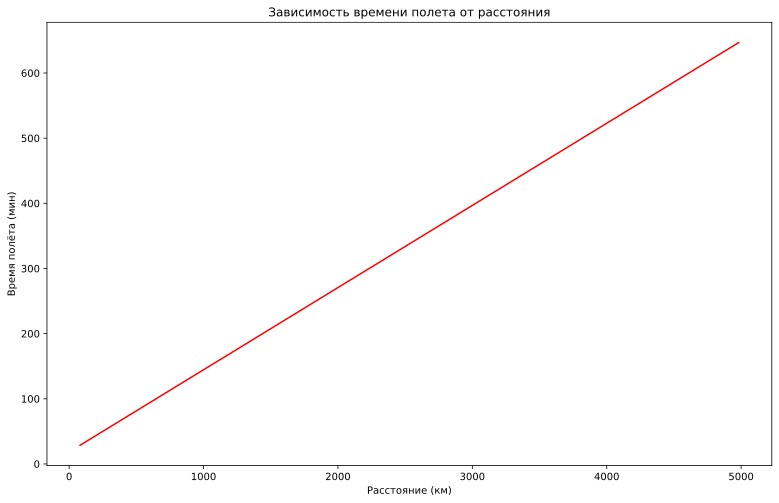

In [25]:
#plt.scatter(distance, airtime)
plt.xlabel('Расстояние (км)')
plt.ylabel('Время полёта (мин)')
plt.title('Зависимость времени полета от расстояния')
z = np.polyfit(distance, airtime, 1)
linear_equation = np.poly1d(z)
plt.plot(distance, linear_equation(distance), color = 'red')
print('Уравнение линейной зависимости (зависимость времени полета от расстояния):', linear_equation)

Коэффициент **0.1261**x означает, что увеличение расстояния перелета на 1 км приводит в среднем к увеличению времени полета на **0.1261** минут.

Intercept **18.47** в обшем случае это значение времени полета, когда расстояние перелета равно 0. Но расстояние полета, равное 0, не имеет особого смысла, поэтому какой-то наглядной, кроме формальной, интерпретации нет.

### Задание 5. *Постройте нормированную гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании. Сделайте предположение о том, каким распределением может описываться полученная гистограмма, оцените параметры этого распределения и нанесите график плотности на график с гистограммой. Вопрос со звездочкой (необязательный): с помощью подходящего статистического теста проверьте, можно ли принять гипотезу о выбранном распределении?*

In [26]:
df_gist_dep = df[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 15)]

In [27]:
df_gist_dep

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


In [28]:
df_gist_arr = df_gist_dep['arr_delay']

In [29]:
df_gist_arr

0         11.0
1         20.0
2         33.0
3        -18.0
4        -25.0
          ... 
336765   -17.0
336766   -20.0
336767   -16.0
336768     1.0
336769   -25.0
Name: arr_delay, Length: 256608, dtype: float64

<Axes: title={'center': 'Нормированная гистограмма распределения задержки прилета'}, ylabel='Density'>

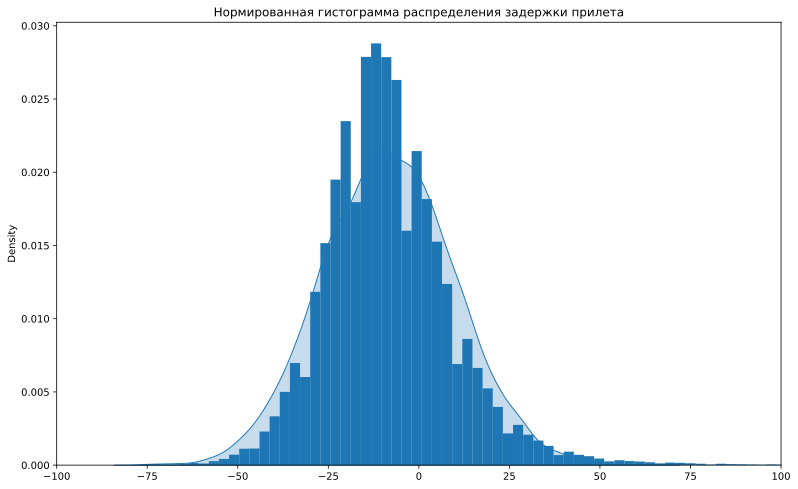

In [30]:
plt.hist(df_gist_arr, bins = 100, density=True)
plt.title('Нормированная гистограмма распределения задержки прилета')
plt.xlim(-100, 100)
normal_function = stats.norm(loc = df_gist_arr.mean(), scale = df_gist_arr.std(ddof=1)).rvs(10000)
sns.kdeplot(normal_function, fill=True)

Кажется, что полученная гистрограмма может описываться нормальным распределением. Воспользуемся `критерием Колмогорова-Смирнова.`

In [31]:
stats.kstest(df_gist_arr, 'norm', args=(df_gist_arr.mean(), df_gist_arr.std(ddof=1)))

KstestResult(statistic=0.06353745240085662, pvalue=0.0, statistic_location=-3.0, statistic_sign=1)

$p-value = 0$ => гипотеза о нормальности **отвергается.**